# The Discrete Logarithm problem

The discrete logarithm problem is that if given $a$ and $b = a^s$, we have to determine $s$. Say we have the function $f(x_1,x_2) = a^{sx_1 + x_2}\mod N$ and let say $r$ is the smallest positive integer $a^r\mod N = 1$. This function's period is a tuple $(l,-ls)$. Say we have a unitary $U|{x_1}\rangle|{x_2}\rangle|{y}\rangle = |{x_1}\rangle|{x_2}\rangle|{y \oplus f(x_1,x_2)}\rangle$ we can actually find its period in a similar manner to the period finding algorithm described previously.

So we just start with the state $|{0}\rangle|{0}\rangle|{0}\rangle$ over three registers where the first two have $t = O(\text{ceil}(\log r + \log(1/\epsilon)))$ qubits and the third one stores the function and then create the superposition states for the first two register. We then apply the unitary on the state and that can be decomposed in a similar way as shown in step 3 of the period finding algorithms procedure to 
$$\dfrac{1}{2^t}\sum_{x_1=0}^{2^t-1}\sum_{x_2=0}^{2^t-1}|{x_1}\rangle|{x_2}\rangle|{f(x_1,x_2)}\rangle$$ 
$$\approx \dfrac{1}{2^t\sqrt{r}}\sum_{l_2=0}^{r-1}\sum_{x_1=0}^{2^t-1}\sum_{x_2=0}^{2^t-1}e^{2\pi\iota(sl_2x_1 + l_2x_2)/r}|{x_1}\rangle|{x_2}\rangle|{\hat{f}(sl_2,l_2)}\rangle$$
\begin{equation}= \dfrac{1}{2^t\sqrt{r}}\sum_{l_2=0}^{r-1}\left[\sum_{x_1=0}^{2^t-1}e^{2\pi\iota(sl_2x_1)/r}\right]\left[\sum_{x_2=0}^{2^t-1}e^{2\pi\iota(l_2x_2)/r}\right]|{x_1}\rangle|{x_2}\rangle|{\hat{f}(sl_2,l_2)}\rangle\end{equation}

We can see that applying the inverse Fourier transform and see that we will be left with a state to be this
$$\dfrac{1}{\sqrt{r}}\sum_{l_2 = 0}^{r - 1}|sl_2/r\rangle|l_2/r\rangle|{\hat{f}(sl_2,l_2)}\rangle$$
Now this has some abuse of notation happening here. So first off, the actual state would not be $|sl_2/r\rangle$ but rather would be $|sl_2/r*(2^t)\mod(2^t)\rangle$ as the state stored in that register so on measurement you would have to analyze the results keeping this in mind. Using the results keeping this in mind, you can analyze the fractions of their phases of the eigen values of the oracle (the logic of phase estimation) and that would be $(sl_2/r*(2^t)\mod(2^t))/(2^t)$.

Note that $|{\hat{f}(l_1,l_2)}\rangle = \dfrac{1}{\sqrt{r}}\sum_{j=0}^{r-1}e^{-2\pi\iota{l_2j}/r}|{f(0,j)}\rangle$ which is the Fourier transform of $f(x_1,x_2)$. Note that $l_1,l_2$ must satisfy $\sum_{k=0}^{r-1}e^{2\pi\iota{k(l_1/s - l_2)}/r} = r$ else the amplitude of $f(l_1,l_2)$ would go to zero.

## Corrections made:
The oracle actually does the operation $O|x_1\rangle|x_2\rangle|y\rangle = |x_1\rangle|x_2\rangle|y * f(x_1,x_2)\rangle$ and $f(x_1,x_2) = a^{x_1}b^{x_2}\mod{15}$ whereas in the uncorrected version it was written as $O|x_1\rangle|x_2\rangle|y\rangle = |x_1\rangle|x_2\rangle|y * f(x_1,x_2)\rangle$ and $f(x_1,x_2) = b^{x_1}a^{x_2}\mod{15}$. This doesn't change any of the underlying concept since this just switches the position of the two registers otherwise it is the exact same. We are sorry for any inconveniences caused.


In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from tabulate import tabulate
# Loading your IBM Q account(s)
provider = IBMQ.load_account()
#Get the library to check the answers
%pip install -I git+https://github.com/mnp-club/MnP_QC_Workshop.git
from mnp_qc_workshop_2020.discrete_logarithm import qft_dagger, oracle, check_answer

  Cloning https://github.com/mnp-club/MnP_QC_Workshop.git to /private/var/folders/jr/81mfbkqj54bgmc6dg72ms6t00000gn/T/pip-req-build-wotfjile
  Running command git clone -q https://github.com/mnp-club/MnP_QC_Workshop.git /private/var/folders/jr/81mfbkqj54bgmc6dg72ms6t00000gn/T/pip-req-build-wotfjile
  Created wheel for mnp-qc-workshop-2020: filename=mnp_qc_workshop_2020-0.1-py3-none-any.whl size=6878 sha256=be4b885cd2ea853c3157e770c69d960f002ca01388c3fd1e2d9789b4cd785b1e
  Stored in directory: /private/var/folders/jr/81mfbkqj54bgmc6dg72ms6t00000gn/T/pip-ephem-wheel-cache-ht81ljlr/wheels/8a/05/36/f117ccc148756e959adcc34f0e038da439d98f3d4d8b1e8133
Successfully built mnp-qc-workshop-2020
You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


A thing we can note is that we do not neccessarily need to construct the oracle for $U|x_1\rangle|x_2\rangle|y\rangle = |x_1\rangle|x_2\rangle|y \oplus f(x_1,x_2)\rangle$ we can also use the oracle for $U|x_1\rangle|x_2\rangle|y\rangle = |x_1\rangle|x_2\rangle|y * f(x_1,x_2)\rangle$ and just set $|y\rangle = |1\rangle$.

## Your task

So you are now given an oracle which does the following operation $O|x_1\rangle|x_2\rangle|y\rangle = |x_1\rangle|x_2\rangle|y * f(x_1,x_2)\rangle$ and $f(x_1,x_2) = a^{x_1}b^{x_2}\mod{15}$ and here $|x_1\rangle$ and $|x_2\rangle$ are 3 qubit states and quite trivially the state of $|y * f(x_1,x_2)\rangle$ will be stored using 4 qubits. Your task is to find the values of $a$ and $b$ using the discrete logarithm setup described above to find the minimum $s$ (which is an integer) for $a^s = b$ and you are free to perform additional analysis using the oracle to find out the values of $a$ and $b$. An obvious clue that you can see is that both $a$ and $b$ are coprime with 15. Also assume that $a,b < 15$

For performing inverse fourier transform over some $n$ qubits from the circuit just use <code>QuantumCircuit.append(qft_dagger(n), qubits)</code> and for attaching the oracle use <code>QuantumCircuit.append(oracle(), qubits)</code>.

**Note:** use the qiskit notation everywhere except for the third register so if you want to put the thrd register into the state $|1\rangle$ you have to apply an $X$ gate at the q_9 which is the first qubit of the third register.

There is a possibility that you would have reached the answer pretty easily but I would urge you to reach it with as much rigor as possible. This question is anyway in the bonus category so you need not think about the points you will receive.

In [7]:
n_qubits = 3 #Number of qubits for the registers of |x1> and |x2>
#For figuring out you would just need 2*n_qubits classical bits
qc_disc_log = QuantumCircuit(4+n_qubits+n_qubits, n_qubits+n_qubits)

for i in range(n_qubits):
    qc_disc_log.h(i)
    qc_disc_log.h(i+n_qubits)

qc_disc_log.x(3+2*n_qubits)
qc_disc_log.append(oracle(), [i for i in range(10)])

qc_disc_log.append(qft_dagger(3), [0,1,2])
qc_disc_log.append(qft_dagger(3), [3,4,5])

qc_disc_log.measure(range(6),range(6))

qc_disc_log.draw('text')

┌───┐┌─────────┐┌───────┐┌─┐               
q_0: ┤ H ├┤0        ├┤0      ├┤M├───────────────
     ├───┤│         ││       │└╥┘┌─┐            
q_1: ┤ H ├┤1        ├┤1 QFT† ├─╫─┤M├────────────
     ├───┤│         ││       │ ║ └╥┘┌─┐         
q_2: ┤ H ├┤2        ├┤2      ├─╫──╫─┤M├─────────
     ├───┤│         │├───────┤ ║  ║ └╥┘┌─┐      
q_3: ┤ H ├┤3        ├┤0      ├─╫──╫──╫─┤M├──────
     ├───┤│         ││       │ ║  ║  ║ └╥┘┌─┐   
q_4: ┤ H ├┤4        ├┤1 QFT† ├─╫──╫──╫──╫─┤M├───
     ├───┤│  Oracle ││       │ ║  ║  ║  ║ └╥┘┌─┐
q_5: ┤ H ├┤5        ├┤2      ├─╫──╫──╫──╫──╫─┤M├
     └───┘│         │└───────┘ ║  ║  ║  ║  ║ └╥┘
q_6: ─────┤6        ├──────────╫──╫──╫──╫──╫──╫─
          │         │          ║  ║  ║  ║  ║  ║ 
q_7: ─────┤7        ├──────────╫──╫──╫──╫──╫──╫─
          │         │          ║  ║  ║  ║  ║  ║ 
q_8: ─────┤8        ├──────────╫──╫──╫──╫──╫──╫─
     ┌───┐│         │          ║  ║  ║  ║  ║  ║ 
q_9: ┤ X ├┤9        ├──────────╫──╫──╫──╫──╫──╫─
     └───┘└─────────┘          ║  ║  ║  ║  ║  ║ 
c_0: ══════════════════════════╩══╬══╬══╬══╬══╬═
                                  ║  ║  ║  ║  ║ 
c_1: ═════════════════════════════╩══╬══╬══╬══╬═
                                     ║  ║  ║  ║ 
c_2: ════════════════════════════════╩══╬══╬══╬═
                                        ║  ║  ║ 
c_3: ═══════════════════════════════════╩══╬══╬═
                                           ║  ║ 
c_4: ══════════════════════════════════════╩══╬═
                                              ║ 
c_5: ═════════════════════════════════════════╩═

Now that you have made the required circuit (hopefully it is correct) let us go ahead and run it and check our results. If done correctly you can expect four values to only be reached.

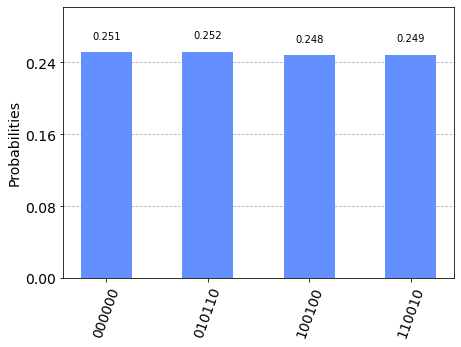

In [8]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc_disc_log, backend, shots=8192).result()
counts = results.get_counts()
plot_histogram(counts)

Let us now analyze these results. Do refer the explanation in the beginning to properly analyze the results and infer a value of $s$ from there.

In [9]:
rows_x_1, eigenvalues_x_1 = [], []
for output in counts:
    decimal = int(output, 2)//8
    eigenvalue = decimal/(2**3)
    eigenvalues_x_1.append(eigenvalue)
    rows_x_1.append(["%s(bin) = %i(dec)" % (output[0:3], decimal), "%i/%i = %.2f" % (decimal, 2**3, eigenvalue)])
print(tabulate(rows_x_1, headers=["Register Output", "Phase"]))

Register Output    Phase
-----------------  ----------
010(bin) = 2(dec)  2/8 = 0.25
000(bin) = 0(dec)  0/8 = 0.00
100(bin) = 4(dec)  4/8 = 0.50
110(bin) = 6(dec)  6/8 = 0.75


In [10]:
rows_x_2, eigenvalues_x_2 = [], []
for output in counts:
    decimal = int(output, 2) - ((int(output, 2)//8)*8)
    eigenvalue = decimal/(2**3)
    eigenvalues_x_2.append(eigenvalue)
    rows_x_2.append(["%s(bin) = %i(dec)" % (output[3:6], decimal), "%i/%i = %.2f" % (decimal, 2**3, eigenvalue)])
print(tabulate(rows_x_2, headers=["Register Output", "Phase"]))

Register Output    Phase
-----------------  ----------
110(bin) = 6(dec)  6/8 = 0.75
000(bin) = 0(dec)  0/8 = 0.00
100(bin) = 4(dec)  4/8 = 0.50
010(bin) = 2(dec)  2/8 = 0.25


You have hopefully got the value of $s$ from these analysis. Go ahead and store it in the variable <code>s</code> in the next cell.

In [11]:
#Store your value for s here
s = 3

Now you can go ahead and analyze the oracle for getting an idea of the value of $a$ and $b$. Another clue for figuring that out is that in the results for discrete logarithm, you should only get four possibilities and this should tell you the order of $a$ with respect to $15$.

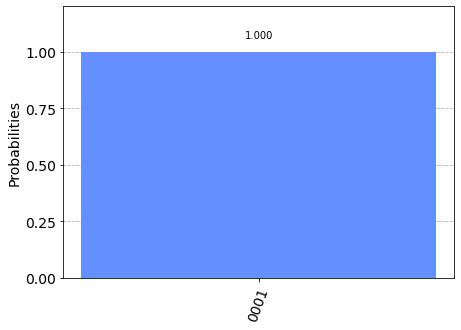

In [66]:
qc_disc_log = QuantumCircuit(4+n_qubits+n_qubits, 4)

#qc_disc_log.x(0)
qc_disc_log.x(3)
qc_disc_log.x(9)
qc_disc_log.append(oracle(), [i for i in range(10)])

qc_disc_log.measure(range(6,10),range(4))

backend = Aer.get_backend('qasm_simulator')
results = execute(qc_disc_log, backend, shots=8192).result()
counts = results.get_counts()
plot_histogram(counts)

#on x1 = 1, output = 2 and for x2 = 1, output = 8

Now if you have figured out the values of $a$ and $b$ you can go ahead and store them in the variables <code>a, b</code> in the next cell

In [67]:
#Store values of a and b here
a, b = 2,8

You can now get your answers checked by running the below cell

In [68]:
check_answer(s,a,b)

All your values are correct :) You may go ahead and submit the notebook
